<a href="https://colab.research.google.com/github/keplercore/X-ray-project/blob/main/X_ray_CV_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import cv2
import os
import glob
import gc
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Obróbka danych


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from os import listdir
from os.path import isfile, join
mypath = "/content/drive/MyDrive/chest_xray/train/NORMAL"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

my_path_pn = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
onlypn = [f for f in listdir(my_path_pn) if isfile(join(my_path_pn, f))]


In [5]:
target = np.zeros((len(onlyfiles)))
df = pd.DataFrame(target)

target1 = pd.DataFrame(np.ones(len(onlypn)))

df = df.append(target1)

df = df.reset_index(drop = True)

df.info

<bound method DataFrame.info of         0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
5211  1.0
5212  1.0
5213  1.0
5214  1.0
5215  1.0

[5216 rows x 1 columns]>

In [6]:
X = []
y = []

In [7]:
from os import listdir
from os.path import isfile, join
mypath = "/content/drive/MyDrive/chest_xray/train/NORMAL"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#['1.jpg', '2.jpg']

In [8]:
for image in onlyfiles:
  img = cv2.imread(mypath + "/" + image)
  img = cv2.resize(img, (150,150))
  X.append(img)

In [9]:
from os import listdir
from os.path import isfile, join
mypath = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
onlypn = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#['1.jpg', '2.jpg']

In [10]:
for image in onlypn:
  img = cv2.imread(mypath + "/" + image)
  img = cv2.resize(img, (150,150))

  X.append(img)
  

Budowa zbirów


In [11]:
y = np.array(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [12]:
# 0-255 to 0-1
X_train, X_test = np.array(X_train), np.array(X_test)
X_train, X_test = X_train/255, X_test/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(y_train) 
test_y_one_hot = to_categorical(y_test)

In [13]:
X_test[1].dtype


dtype('float64')

CNN


In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import tensorflow as tf

In [26]:
model = Sequential()

#Convolution
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 2))

# Compile the Neural network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, train_y_one_hot,
                   batch_size=64, epochs=10, verbose=True,
                   validation_data=(X_test, test_y_one_hot))

Epoch 1/10
66/66 [==============================] - 17s 58ms/step - loss: 0.4371 - accuracy: 0.8126 - val_loss: 0.1688 - val_accuracy: 0.9282
Epoch 2/10
66/66 [==============================] - 3s 40ms/step - loss: 0.1108 - accuracy: 0.9616 - val_loss: 0.1046 - val_accuracy: 0.9598
Epoch 3/10
66/66 [==============================] - 3s 40ms/step - loss: 0.0901 - accuracy: 0.9679 - val_loss: 0.1149 - val_accuracy: 0.9665
Epoch 4/10
66/66 [==============================] - 3s 40ms/step - loss: 0.0657 - accuracy: 0.9763 - val_loss: 0.1397 - val_accuracy: 0.9483
Epoch 5/10
66/66 [==============================] - 3s 40ms/step - loss: 0.0504 - accuracy: 0.9825 - val_loss: 0.1117 - val_accuracy: 0.9569
Epoch 6/10
66/66 [==============================] - 3s 40ms/step - loss: 0.0676 - accuracy: 0.9765 - val_loss: 0.1083 - val_accuracy: 0.9626
Epoch 7/10
66/66 [==============================] - 3s 40ms/step - loss: 0.0369 - accuracy: 0.9873 - val_loss: 0.1106 - val_accuracy: 0.9655
Epoch 8/10
6

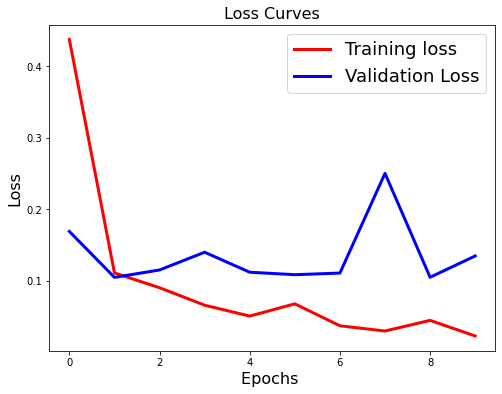

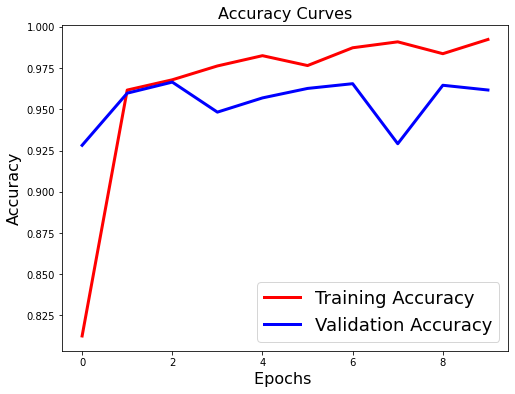

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
 
plot_history(history)

Efficent

In [28]:
import keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from keras.models import Sequential
from keras.layers import UpSampling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

efficient_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [29]:
model = Sequential()
model.add(efficient_model)
model.add(GlobalAveragePooling2D ()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(.25)) 
model.add(BatchNormalization())
num_classes = 2
model.add(Dense(num_classes, activation='softmax'))

for layer in efficient_model.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True 
  else:
    layer.trainable = False

In [30]:
# klasa generatora

import keras
import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, images, labels, batch_size=64, 
               shuffle=False, augment=False):
    self.labels = labels                    # array of labels
    self.images = images                    # array of images
    self.batch_size = batch_size            # batch size
    self.shuffle = shuffle                  # shuffle bool
    self.augment = augment                  # augment data bool
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of batches per epoch'
    return int(np.floor(len(self.images) / self.batch_size))

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.images))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __getitem__(self, index):
    'Generate one batch of data'
    # selects indices of data for next batch
    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

    # select data and load images
    labels = np.array([self.labels[k] for k in indexes])
    images = np.array([self.images[k] for k in indexes])


    # preprocess and augment data
    if self.augment == True:
      images = self.augmentor(images)

    images=images/255
    return images, labels


  def augmentor(self, images):
    'Apply data augmentation'
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    list_of_aumgenters = []
    list_of_aumgenters.extend([sometimes(iaa.Crop(px=(1, 16), keep_size=True)),
                              sometimes(iaa.Fliplr(0.5)),
                              sometimes(iaa.GaussianBlur(sigma=(0, 3.0)))])
    
    seq = iaa.Sequential(list_of_aumgenters)
  
    return seq.augment_images(images)




In [31]:
generator = DataGenerator(images=X_train, labels=train_y_one_hot, batch_size=64, 
                          shuffle=True, augment=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   verbose=1, patience=2)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(generator, epochs=10, verbose=True,
                              validation_data=(X_test, test_y_one_hot),
                              callbacks =[es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
65/65 [==============================] - 28s 287ms/step - loss: 0.7257 - accuracy: 0.6613 - val_loss: 0.5688 - val_accuracy: 0.7433
Epoch 2/10
65/65 [==============================] - 16s 246ms/step - loss: 0.4883 - accuracy: 0.7812 - val_loss: 0.5697 - val_accuracy: 0.7433
Epoch 3/10
65/65 [==============================] - 17s 253ms/step - loss: 0.4281 - accuracy: 0.8171 - val_loss: 0.5666 - val_accuracy: 0.7433
Epoch 4/10
65/65 [==============================] - 17s 252ms/step - loss: 0.3743 - accuracy: 0.8411 - val_loss: 0.9177 - val_accuracy: 0.7433
Epoch 5/10
65/65 [==============================] - 16s 250ms/step - loss: 0.3354 - accuracy: 0.8510 - val_loss: 0.6996 - val_accuracy: 0.7433
Epoch 5: early stopping


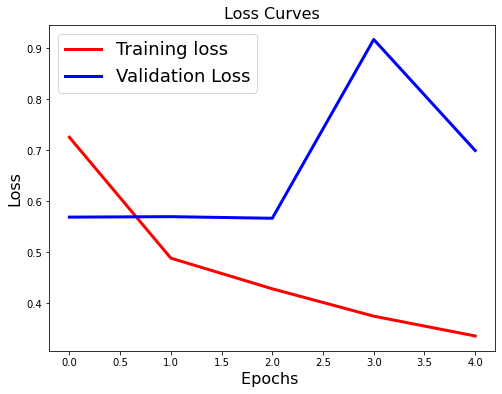

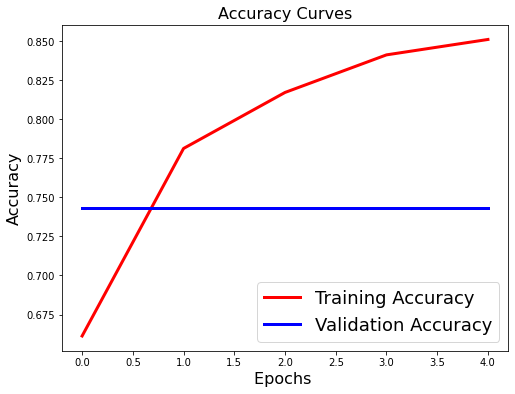

In [32]:
import matplotlib.pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
 
plot_history(history)


Mobilenet


In [39]:
from keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import tensorflow as tf

model = MobileNetV2(input_shape=(X_train.shape[1], X_train.shape[2], 3), classes=2, include_top=False, weights=None)
x=model.layers[-1].output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
flatten=Flatten()(x)
predictions=Dense(2, activation='softmax')(flatten)

model = Model(inputs=model.input, outputs=predictions)

# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy' , metrics= ['accuracy'])
# fit model
history = model.fit(X_train, train_y_one_hot, 
                    epochs=10, batch_size=64, 
                    validation_data= (X_test, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, test_y_one_hot, verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
66/66 [==============================] - 19s 227ms/step - loss: 0.6216 - accuracy: 0.8360 - val_loss: 0.5698 - val_accuracy: 0.7433
Epoch 2/10
66/66 [==============================] - 14s 211ms/step - loss: 0.4377 - accuracy: 0.9099 - val_loss: 0.7424 - val_accuracy: 0.2567
Epoch 3/10
66/66 [==============================] - 14s 209ms/step - loss: 0.3249 - accuracy: 0.9374 - val_loss: 0.7628 - val_accuracy: 0.2567
Epoch 4/10
66/66 [==============================] - 14s 206ms/step - loss: 0.2301 - accuracy: 0.9482 - val_loss: 0.5713 - val_accuracy: 0.7433
Epoch 5/10
66/66 [==============================] - 14s 206ms/step - loss: 0.1685 - accuracy: 0.9614 - val_loss: 0.5767 - val_accuracy: 0.7433
Epoch 6/10
66/66 [==============================] - 14s 208ms/step - loss: 0.1020 - accuracy: 0.9727 - val_loss: 0.5699 - val_accuracy: 0.7433
Epoch 7/10
66/66 [==============================] - 14s 205ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.7730 - val_accuracy: 0.7433

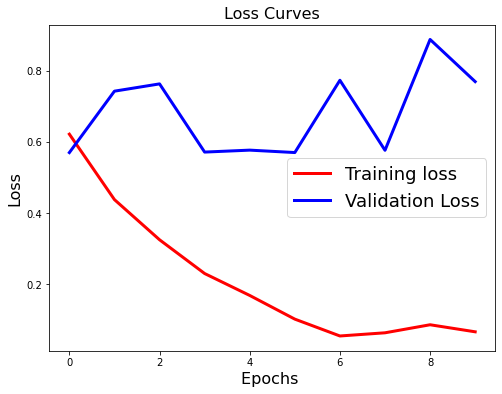

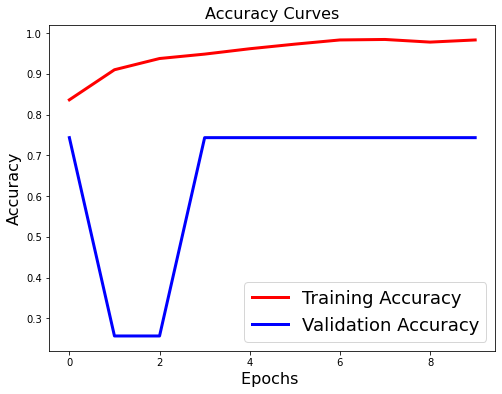

In [40]:
import matplotlib.pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
 
plot_history(history)